# Project on Suppy Chain Management


#### Project Title: Supply Chain Optimization for FMCG Company
#### Aim
The aim of this project is to optimize the supply quantity of instant noodles in each warehouse across the country for a Fast Moving Consumer Goods (FMCG) company. The company has observed a mismatch between demand and supply, leading to inventory cost and overall losses. By leveraging historical data and implementing machine learning algorithms, we aim to develop a model that accurately determines the optimum weight of product to be shipped from each warehouse. Table of Contents


1. Introduction

2. Data Preparation

2. Exploratory Data Analysis (EDA)

3. Model Selection and Training

4. Model Interpretation

5. Next Steps and Improvements

6. Conclusion

Project Overview

The project focuses on optimizing the supply chain for a FMCG company that recently entered the instant noodles business. The company faces a challenge of demand-supply mismatch, leading to increased inventory costs and financial losses. The objective is to build a predictive model that can determine the optimal product weight to be shipped from each warehouse in the country. Goals and Objectives

The primary goals of this project are as follows:
Build a predictive model using historical data to optimize product weight shipments.

Perform thorough data preprocessing, exploratory data analysis (EDA), and feature engineering.

Select and train multiple machine learning algorithms.

Evaluate model performance using appropriate metrics.

Interpret feature importance to gain insights into the supply chain dynamics.

### Data Preparation 

### DATA LOADING

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [2]:
data_train=pd.read_csv("supply_train.csv")
test_data=pd.read_csv('supply_test.csv')

In [3]:
data_train


,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [4]:
test_data

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5524,22145,WH_122145,EID_72145,Rural,Large,North,Zone 6,8,1,3,...,1,203,28.0,2007.0,22,1,A+,2,4,29138
5525,22146,WH_122146,EID_72146,Rural,Small,South,Zone 6,3,1,3,...,0,170,NaN,NaN,26,0,C,5,9,33108
5526,22147,WH_122147,EID_72147,Rural,Large,North,Zone 6,7,2,2,...,0,99,22.0,NaN,20,0,B+,6,4,24072
5527,22148,WH_122148,EID_72148,Rural,Large,North,Zone 6,6,2,4,...,0,220,17.0,NaN,13,0,B,3,28,15055


In [5]:
## Understanding the Data

In [6]:
data_train.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [7]:
test_data.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [8]:
data_train.tail()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
16615,16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,...,1,119,NaN,2007.0,16,0,A,5,15,21103
16619,16619,WH_116619,EID_66619,Rural,Large,West,Zone 5,4,0,6,...,1,261,34.0,2001.0,32,0,B+,4,10,38097


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

This function provides a concise summary of the DataFrame, including the data types of each column and the number of non-null values.

In [10]:
test_data.describe()


,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,5529.00000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000,5319.000000,2844.000000,5529.000000,5529.000000,5529.000000,5529.000000,5529.000000
mean,19385.00000,4.007235,0.765600,3.106167,4980.695424,42.128052,0.104178,0.049919,0.657262,163.899982,29.010528,2009.572785,17.085549,0.298426,3.477302,18.892205,22052.334599
std,1596.22915,2.604325,1.187567,1.128396,1049.617325,15.959934,0.305519,0.217797,0.474668,62.544704,7.848478,7.473201,9.206551,0.457609,1.700717,8.716737,11645.738485
min,16621.00000,0.000000,0.000000,1.000000,1953.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2065.000000
25%,18003.00000,2.000000,0.000000,2.000000,4310.000000,28.000000,0.000000,0.000000,0.000000,110.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,12143.000000
50%,19385.00000,4.000000,0.000000,3.000000,4863.000000,42.000000,0.000000,0.000000,1.000000,165.000000,28.000000,2010.000000,17.000000,0.000000,3.000000,21.000000,22099.000000
75%,20767.00000,6.000000,1.000000,4.000000,5492.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30099.000000
max,22149.00000,8.000000,5.000000,9.000000,10846.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55144.000000


In [11]:
data_train.describe()

,Unnamed: 0,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,15953.000000,8760.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,8309.500000,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.911490,2009.345320,17.127196,0.306137,3.491095,18.727377,22098.420096
std,4797.925072,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.842046,7.544672,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,4154.750000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,2003.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,8309.500000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,12464.250000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2016.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,16619.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


describe function provides a summary of descriptive statistics for numerical columns in the DataFrame, such as count, mean, standard deviation, minimum, maximum, and quartile values.

In [12]:
data_train.shape

(16620, 25)

In [13]:
data_train.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [14]:
data_train.nunique()

Unnamed: 0                      16620
Ware_house_ID                   16620
WH_Manager_ID                   16620
Location_type                       2
WH_capacity_size                    3
zone                                4
WH_regional_zone                    6
num_refill_req_l3m                  9
transport_issue_l1y                 6
Competitor_in_mkt                  12
retail_shop_num                  4356
wh_owner_type                       2
distributor_num                    56
flood_impacted                      2
flood_proof                         2
electric_supply                     2
dist_from_hub                     217
workers_num                        60
wh_est_year                        28
storage_issue_reported_l3m         37
temp_reg_mach                       2
approved_wh_govt_certificate        5
wh_breakdown_l3m                    7
govt_check_l3m                     32
product_wg_ton                   4248
dtype: int64

### cleaning the data
it's essential to identify which columns or features in the dataset contain missing values. This is typically done using functions like isnull() or info() in pandas.

Numerical features were imputed with the median values.

Categorical features, representing non-numeric data with discrete categories, were filled with default categories or modes.

In [16]:
data_train.isnull().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [17]:
#Filling missing vales with the median
data_train['workers_num'].fillna(data_train['workers_num'].median(),inplace=True)
test_data['workers_num'].fillna(test_data['workers_num'].median(),inplace=True)

In [18]:
# Filling missing values with the median or mode
data_train['wh_est_year'].fillna(data_train['wh_est_year'].median(), inplace=True)
test_data['wh_est_year'].fillna(test_data['wh_est_year'].median(), inplace=True)

In [19]:
# Filling missing values with a default category or mode
data_train['approved_wh_govt_certificate'].fillna('NIL', inplace=True)
test_data['approved_wh_govt_certificate'].fillna('NIL', inplace=True)

In [20]:
# Check for missing values
data_train.isnull().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [21]:
test_data.isnull().sum()


Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

### Encoding Categorical Values
Categorical variables were encoded using one-hot encoding to make them suitable for machine learning models.

In [22]:
# Encode categorical variables (One-Hot Encoding)
train_data = pd.get_dummies(data_train, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type', 
                                                 'approved_wh_govt_certificate'])
train_data

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,...,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,approved_wh_govt_certificate_NIL
0,0,WH_100000,EID_50000,Small,3,1,2,4651,24,0,...,False,True,False,True,True,False,False,False,False,False
1,1,WH_100001,EID_50001,Large,0,0,4,6217,47,0,...,True,False,True,False,True,False,False,False,False,False
2,2,WH_100002,EID_50002,Mid,1,0,4,4306,64,0,...,False,False,True,False,True,False,False,False,False,False
3,3,WH_100003,EID_50003,Mid,7,4,2,6000,50,0,...,False,False,False,True,False,True,False,False,False,False
4,4,WH_100004,EID_50004,Large,3,1,2,4740,42,1,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Large,3,1,6,4779,70,0,...,False,True,False,True,False,False,False,True,False,False
16616,16616,WH_116616,EID_66616,Large,2,0,2,5718,26,0,...,True,False,True,False,False,False,False,True,False,False
16617,16617,WH_116617,EID_66617,Large,5,0,4,4514,50,1,...,False,True,True,False,False,False,True,False,False,False
16618,16618,WH_116618,EID_66618,Small,3,2,3,5829,59,1,...,False,True,False,True,True,False,False,False,False,False


In [23]:
# Encode categorical variables (One-Hot Encoding)
test_data = pd.get_dummies(data_train, columns=['Location_type', 'zone', 'WH_regional_zone', 'wh_owner_type', 
                                                 'approved_wh_govt_certificate'])
test_data

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,WH_capacity_size,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,...,WH_regional_zone_Zone 5,WH_regional_zone_Zone 6,wh_owner_type_Company Owned,wh_owner_type_Rented,approved_wh_govt_certificate_A,approved_wh_govt_certificate_A+,approved_wh_govt_certificate_B,approved_wh_govt_certificate_B+,approved_wh_govt_certificate_C,approved_wh_govt_certificate_NIL
0,0,WH_100000,EID_50000,Small,3,1,2,4651,24,0,...,False,True,False,True,True,False,False,False,False,False
1,1,WH_100001,EID_50001,Large,0,0,4,6217,47,0,...,True,False,True,False,True,False,False,False,False,False
2,2,WH_100002,EID_50002,Mid,1,0,4,4306,64,0,...,False,False,True,False,True,False,False,False,False,False
3,3,WH_100003,EID_50003,Mid,7,4,2,6000,50,0,...,False,False,False,True,False,True,False,False,False,False
4,4,WH_100004,EID_50004,Large,3,1,2,4740,42,1,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,16615,WH_116615,EID_66615,Large,3,1,6,4779,70,0,...,False,True,False,True,False,False,False,True,False,False
16616,16616,WH_116616,EID_66616,Large,2,0,2,5718,26,0,...,True,False,True,False,False,False,False,True,False,False
16617,16617,WH_116617,EID_66617,Large,5,0,4,4514,50,1,...,False,True,True,False,False,False,True,False,False,False
16618,16618,WH_116618,EID_66618,Small,3,2,3,5829,59,1,...,False,True,False,True,True,False,False,False,False,False


### Feature Scaling

Numerical features were normalized using Min-Max scaling to ensure that they have a consistent scale for modeling.

In [24]:
# Normalize numerical features (e.g., using Min-Max scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_data[['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'flood_impacted',
            'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 
            'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']] = scaler.fit_transform(train_data[['num_refill_req_l3m',
            'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'flood_impacted', 'flood_proof', 'electric_supply', 
            'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
            'product_wg_ton']])
test_data[['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'flood_impacted',
           'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 
           'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']] = scaler.transform(test_data[['num_refill_req_l3m', 
            'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'flood_impacted', 'flood_proof', 'electric_supply', 
            'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m',
            'product_wg_ton']])

In [25]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 40 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        16620 non-null  int64  
 1   Ware_house_ID                     16620 non-null  object 
 2   WH_Manager_ID                     16620 non-null  object 
 3   WH_capacity_size                  16620 non-null  object 
 4   num_refill_req_l3m                16620 non-null  float64
 5   transport_issue_l1y               16620 non-null  float64
 6   Competitor_in_mkt                 16620 non-null  float64
 7   retail_shop_num                   16620 non-null  float64
 8   distributor_num                   16620 non-null  int64  
 9   flood_impacted                    16620 non-null  float64
 10  flood_proof                       16620 non-null  float64
 11  electric_supply                   16620 non-null  float64
 12  dist

### Feature Engineering

Several feature engineering steps were performed to enhance model performance. These included creating interaction features, calculating capacity utilization, determining the age of warehouses, and generating location-based features.

### Interaction Features:

Create interaction features between related variables. For example, you can calculate the interaction between the number of retail shops and the presence of competitors in the market.

In [26]:
data_train.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [27]:
#dropping unnamed column
data_train=data_train.drop('Unnamed: 0',axis=1)
data_train.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,2009.0,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,2009.0,4,0,A,3,17,5074


In [28]:
#creating a new feature warehouse_age 
c=2023
data_train['warehouse_age']=c-data_train['wh_est_year']
data_train.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton', 'warehouse_age'],
      dtype='object')

In [29]:
data_train['WH_regional_zone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16620 entries, 0 to 16619
Series name: WH_regional_zone
Non-Null Count  Dtype 
--------------  ----- 
16620 non-null  object
dtypes: object(1)
memory usage: 130.0+ KB


In [30]:
#Changing data type of WH_regional_zonw
def extract_num(d):
    num=d.split()[-1]
    return int(num)
data_train['WH_regional_zone']=data_train['WH_regional_zone'].apply(extract_num)
data_train['WH_regional_zone'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16620 entries, 0 to 16619
Series name: WH_regional_zone
Non-Null Count  Dtype
--------------  -----
16620 non-null  int64
dtypes: int64(1)
memory usage: 130.0 KB


In [31]:
#Creating a new feature to understand the demand
data_train['demand']=data_train['num_refill_req_l3m']*data_train['retail_shop_num']
data_train.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,warehouse_age,demand
0,WH_100000,EID_50000,Urban,Small,West,6,3,1,2,4651,...,29.0,2009.0,13,0,A,5,15,17115,14.0,13953
1,WH_100001,EID_50001,Rural,Large,North,5,0,0,4,6217,...,31.0,2009.0,4,0,A,3,17,5074,14.0,0


In [32]:
# Calculate the "supply" as the difference between "product_wg_ton" and "demand"
data_train['supply']=data_train['product_wg_ton']-data_train['demand']
data_train.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,warehouse_age,demand,supply
0,WH_100000,EID_50000,Urban,Small,West,6,3,1,2,4651,...,2009.0,13,0,A,5,15,17115,14.0,13953,3162
1,WH_100001,EID_50001,Rural,Large,North,5,0,0,4,6217,...,2009.0,4,0,A,3,17,5074,14.0,0,5074


In [33]:
#The code calculates the product of 'num_refill_req_l3m' and 'retail_shop_num' and stores the result in a new feature called 'demand_interaction.
data_train['demand_interaction'] = data_train['num_refill_req_l3m'] * data_train['retail_shop_num']
data_train.head(2)

,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,warehouse_age,demand,supply,demand_interaction
0,WH_100000,EID_50000,Urban,Small,West,6,3,1,2,4651,...,13,0,A,5,15,17115,14.0,13953,3162,13953
1,WH_100001,EID_50001,Rural,Large,North,5,0,0,4,6217,...,4,0,A,3,17,5074,14.0,0,5074,0


### Capacity Utilization:

Calculate the utilization of warehouse capacity, which can indicate how efficiently the warehouse is being used.

In [34]:
# Convert 'num_refill_req_l3m' and 'WH_capacity_size' columns to numeric type
train_data['num_refill_req_l3m'] = pd.to_numeric(train_data['num_refill_req_l3m'], errors='coerce')
train_data['WH_capacity_size'] = pd.to_numeric(train_data['WH_capacity_size'], errors='coerce')
# Now perform the division
train_data['capacity_utilization'] = train_data['num_refill_req_l3m'] / train_data['WH_capacity_size']
train_data['capacity_utilization']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
16615   NaN
16616   NaN
16617   NaN
16618   NaN
16619   NaN
Name: capacity_utilization, Length: 16620, dtype: float64

### Exploratory Data Analysis

EDA was conducted to gain insights into the data and understand the relationships between variables. Summary statistics, data visualization, and correlation analysis were performed.

In [35]:
# Display basic information about the dataset
print("Dataset Info:")
print(data_train.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  int64  
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  

In [36]:
# Summary statistics for train_data
train_summary = data_train.describe()
train_summary

,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,...,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,warehouse_age,demand,supply,demand_interaction
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,...,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.254392,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,...,2009.182010,17.127196,0.306137,3.491095,18.727377,22098.420096,13.817990,20552.912575,1545.507521,20552.912575
std,1.666568,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,...,5.479996,9.163901,0.460901,1.688614,8.619857,11620.337346,5.479996,13925.882177,18154.523706,13925.882177
min,1.000000,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,...,1996.000000,0.000000,0.000000,0.000000,1.000000,2093.000000,0.000000,0.000000,-76009.000000,0.000000
25%,3.000000,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,...,2009.000000,10.000000,0.000000,2.000000,11.000000,13057.000000,13.000000,8974.000000,-11019.750000,8974.000000
50%,5.000000,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,...,2009.000000,18.000000,0.000000,3.000000,19.000000,22099.000000,14.000000,20083.500000,1710.500000,20083.500000
75%,6.000000,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,...,2010.000000,24.000000,1.000000,5.000000,26.000000,30103.000000,14.000000,30801.750000,14424.500000,30801.750000
max,6.000000,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,...,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000,27.000000,88064.000000,53137.000000,88064.000000


In [37]:
print(data_train.dtypes)

Ware_house_ID                    object
WH_Manager_ID                    object
Location_type                    object
WH_capacity_size                 object
zone                             object
WH_regional_zone                  int64
num_refill_req_l3m                int64
transport_issue_l1y               int64
Competitor_in_mkt                 int64
retail_shop_num                   int64
wh_owner_type                    object
distributor_num                   int64
flood_impacted                    int64
flood_proof                       int64
electric_supply                   int64
dist_from_hub                     int64
workers_num                     float64
wh_est_year                     float64
storage_issue_reported_l3m        int64
temp_reg_mach                     int64
approved_wh_govt_certificate     object
wh_breakdown_l3m                  int64
govt_check_l3m                    int64
product_wg_ton                    int64
warehouse_age                   float64


In [38]:
duplicates = data_train.duplicated()
print('Number of duplicate rows = %d' % (duplicates.sum()))

Number of duplicate rows = 0


### Data Visualisation

In [39]:
# Distribution of Numerical Features
numerical_features = ['WH_capacity_size', 'num_refill_req_l3m', 'retail_shop_num',
                      'dist_from_hub', 'workers_num', 'wh_est_year', 'product_wg_ton']
# Categorical Features Distribution
categorical_features = ['Location_type', 'zone', 'WH_regional_zone', 'transport_issue_l1y',
                        'Competitor_in_mkt', 'wh_owner_type', 'flood_impacted', 'flood_proof',
                        'electric_supply', 'storage_issue_reported_l3m', 'temp_reg_mach',
                        'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m']

### Histogram

Histograms help to visualize the distribution of numerical features.


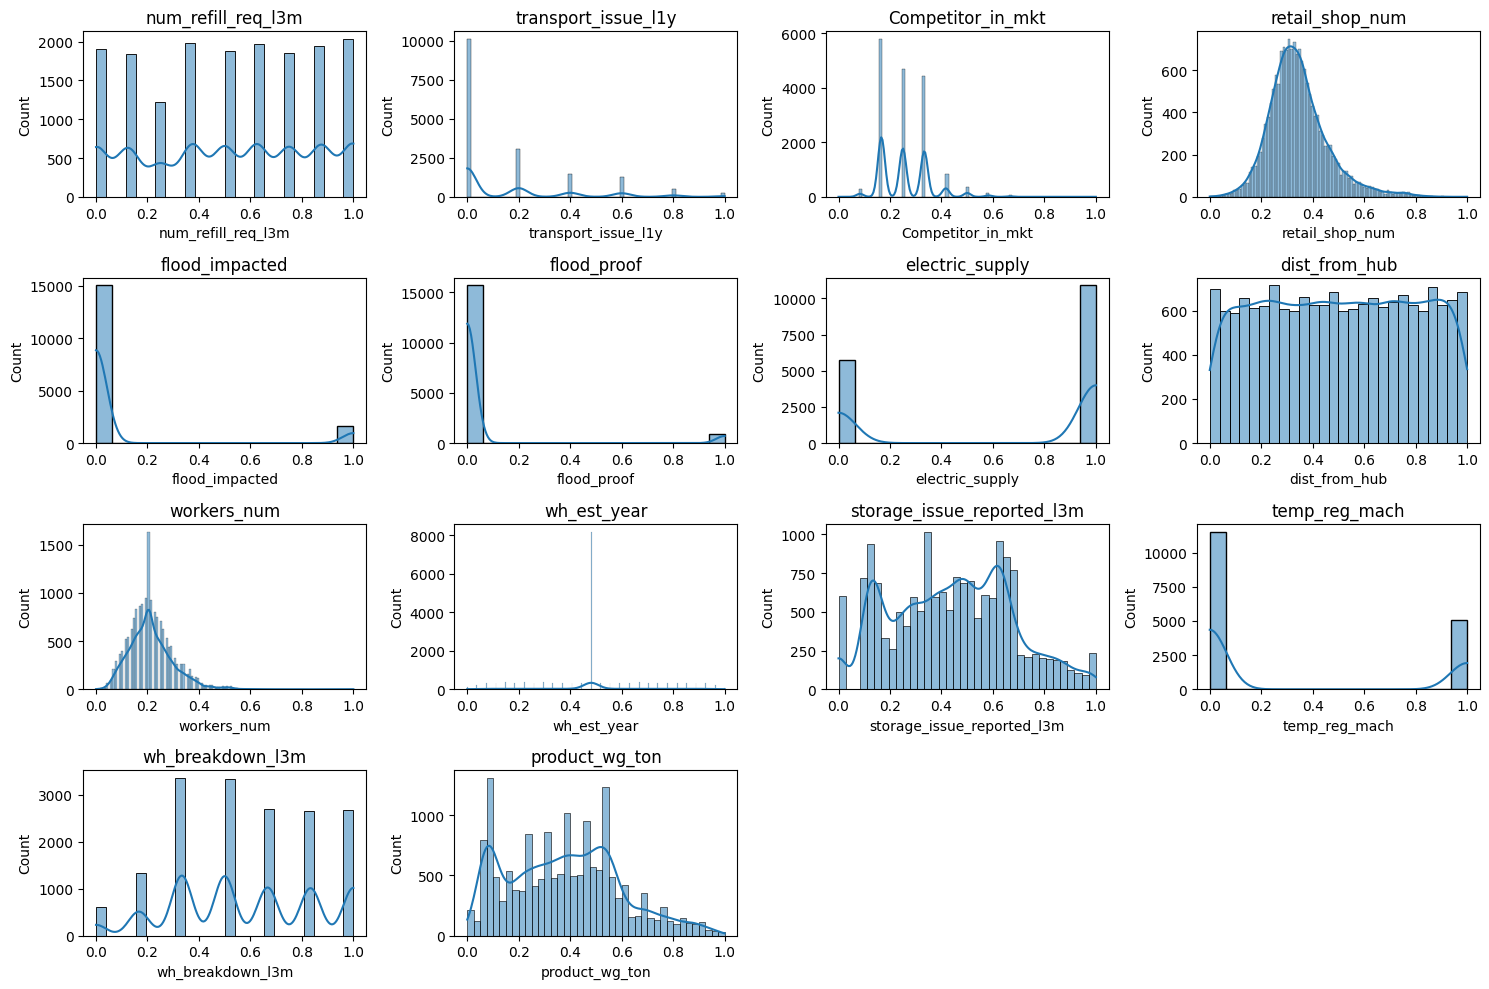

In [40]:
# Plot histograms for numerical features
numerical_columns = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 
                     'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
                     'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'product_wg_ton']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(train_data[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

### BOX PLOT

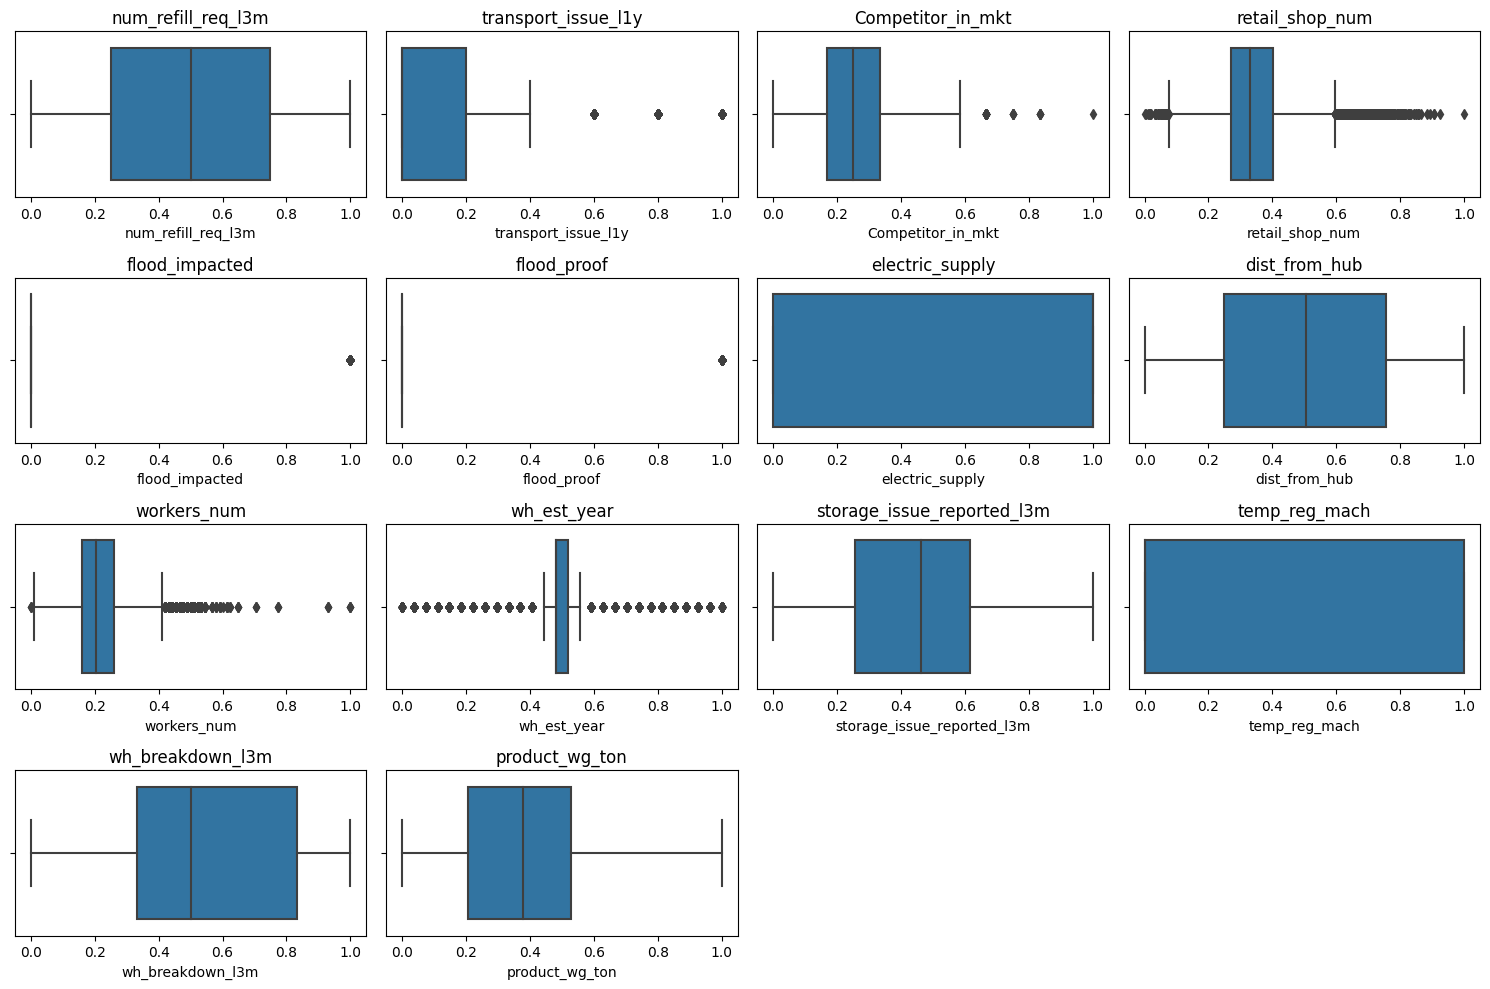

In [41]:
# Plot box plots for numerical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(x=train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

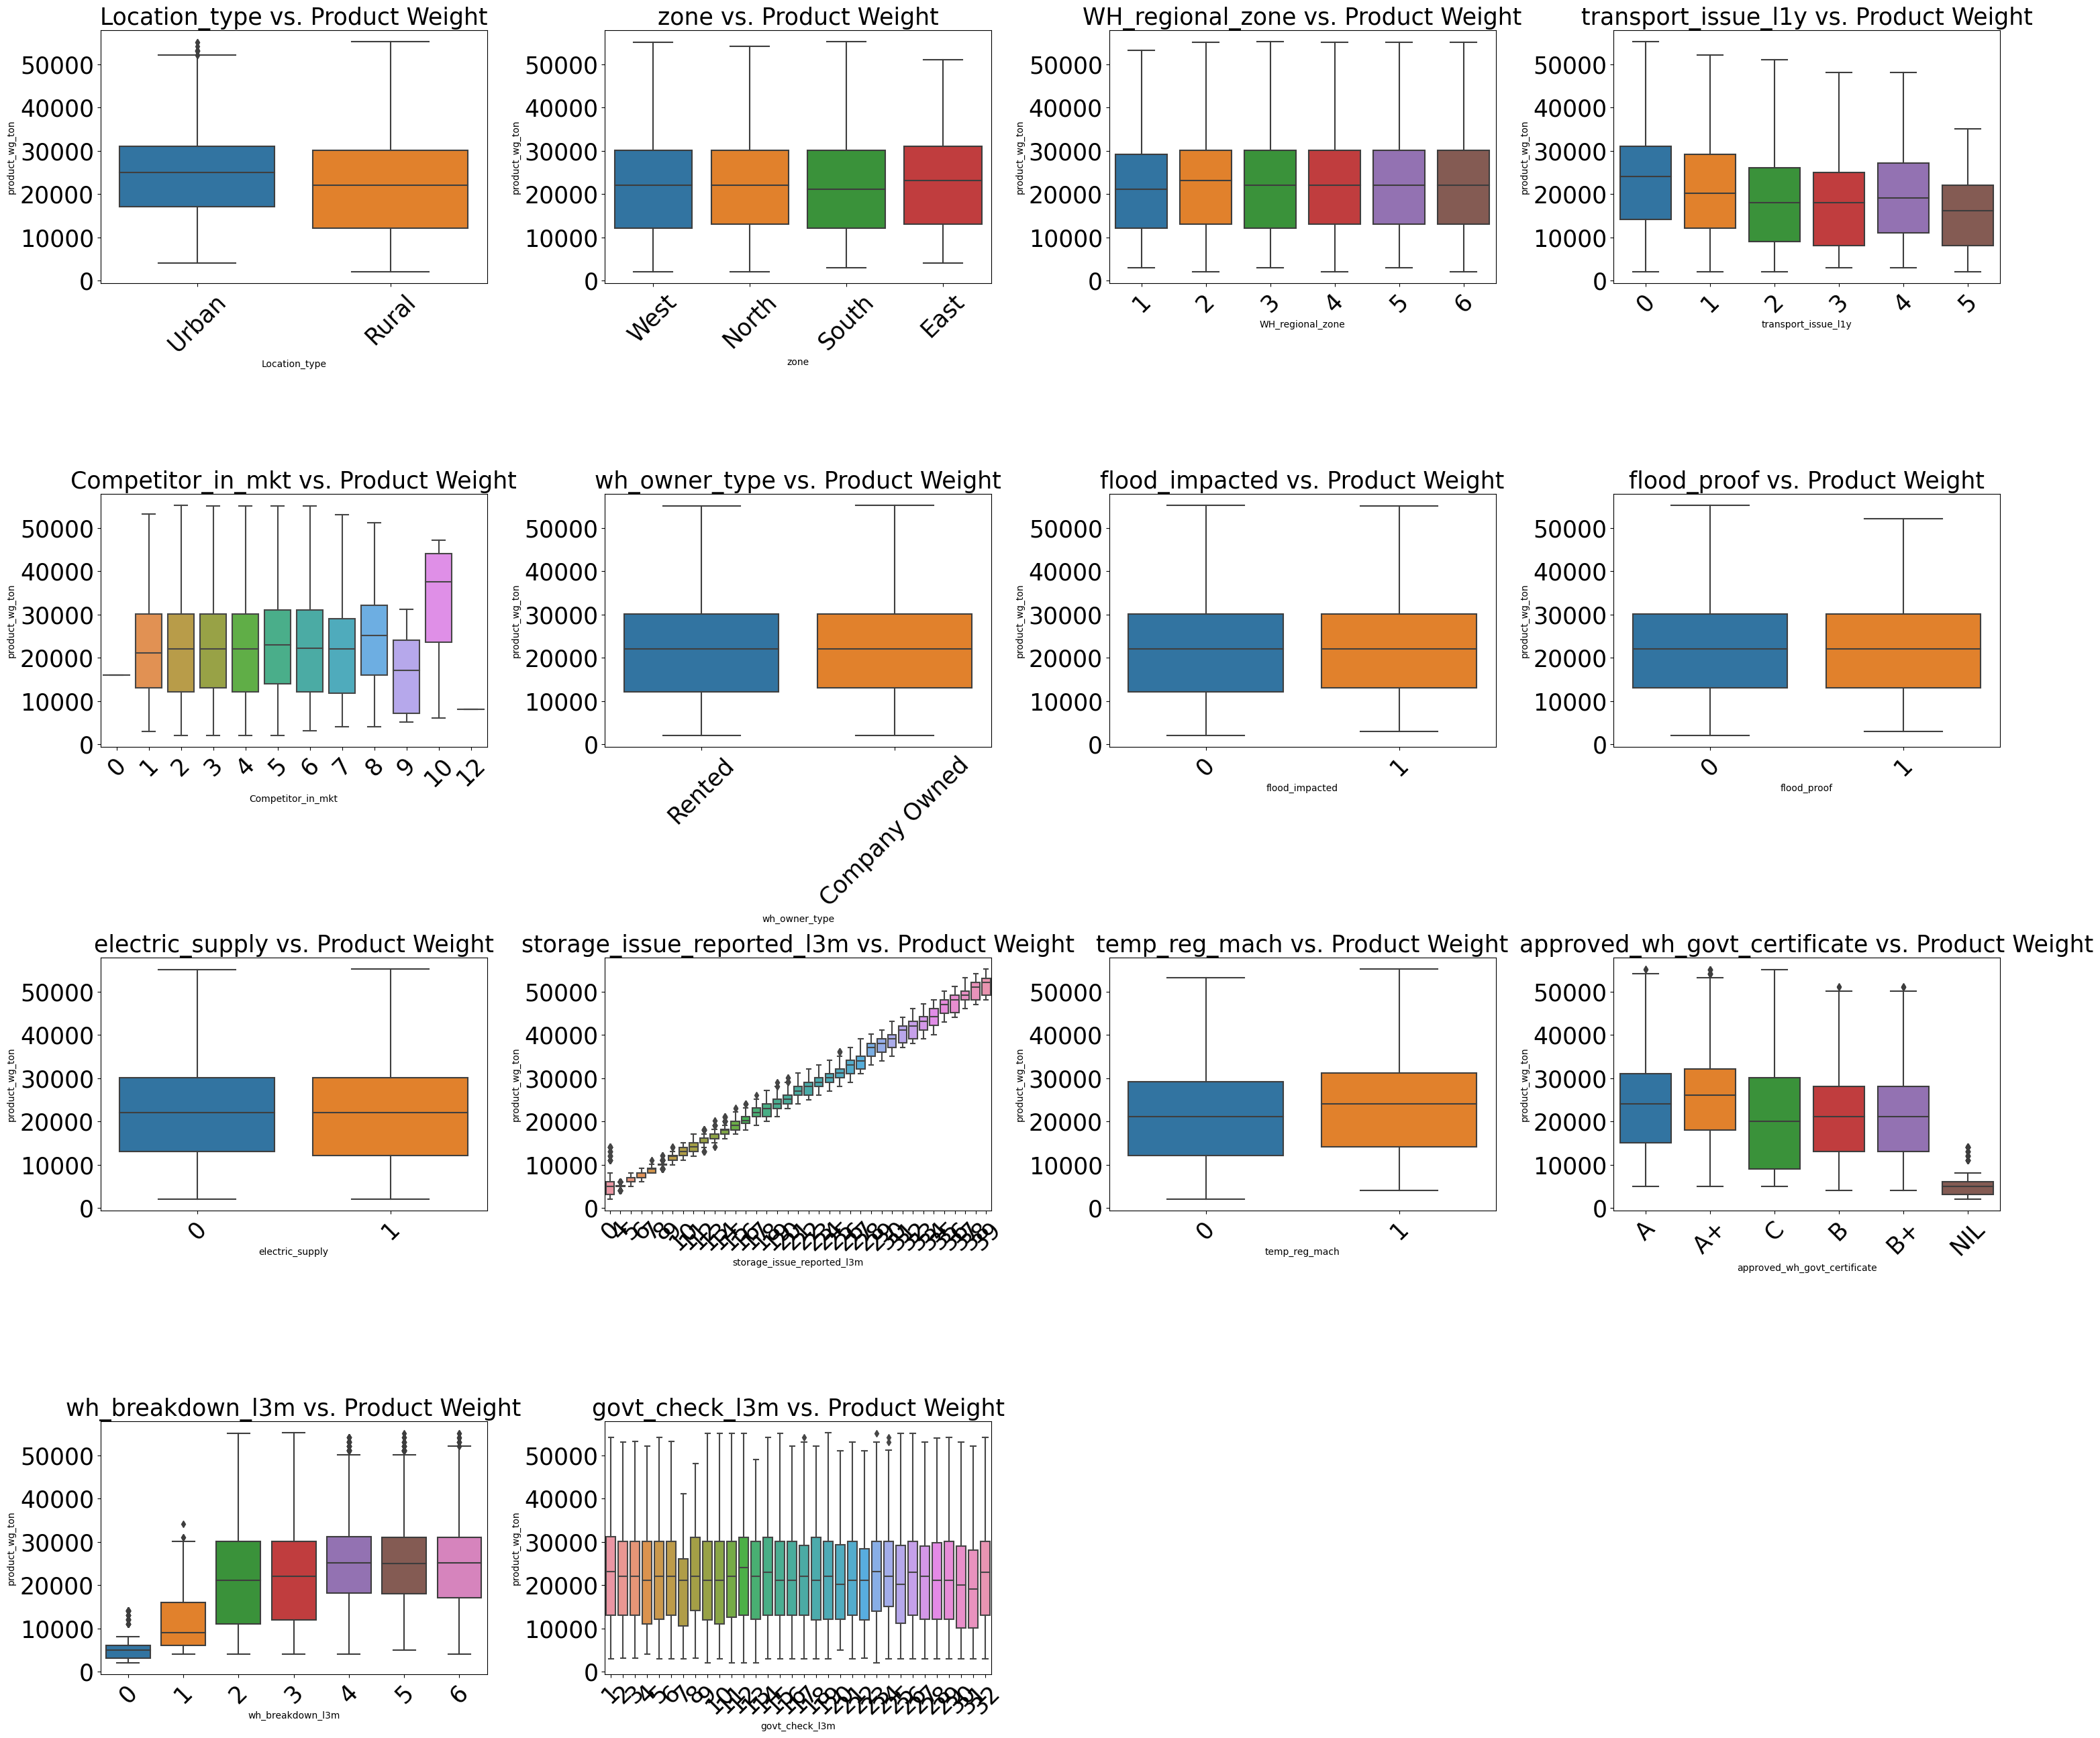

In [42]:
# Box Plots
plt.figure(figsize=(30, 26))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=data_train, x=feature, y='product_wg_ton')
    plt.xticks(rotation=45, fontsize=25)  
    plt.yticks(fontsize=25)  
    plt.title(f'{feature} vs. Product Weight', fontsize=25)  

plt.tight_layout()
plt.show()

#### Count Plots

In [43]:
#Most Supplied zone
zone_count=data_train['zone'].value_counts()
most_supplied_zone = zone_count.idxmax()
print("Most Supplied Zone : ",most_supplied_zone)

Most Supplied Zone :  North


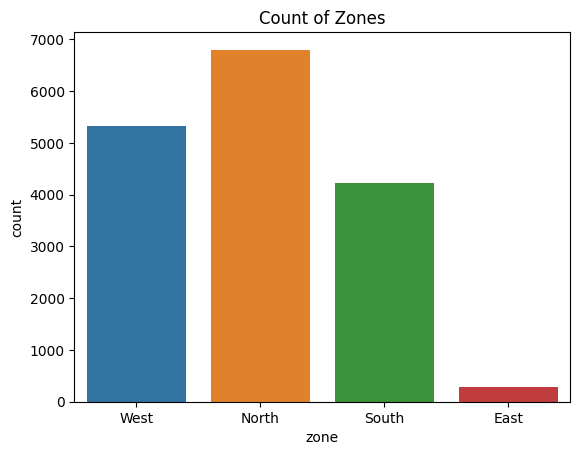

In [44]:
sns.countplot(x=data_train.zone)
plt.title("Count of Zones")
plt.show()

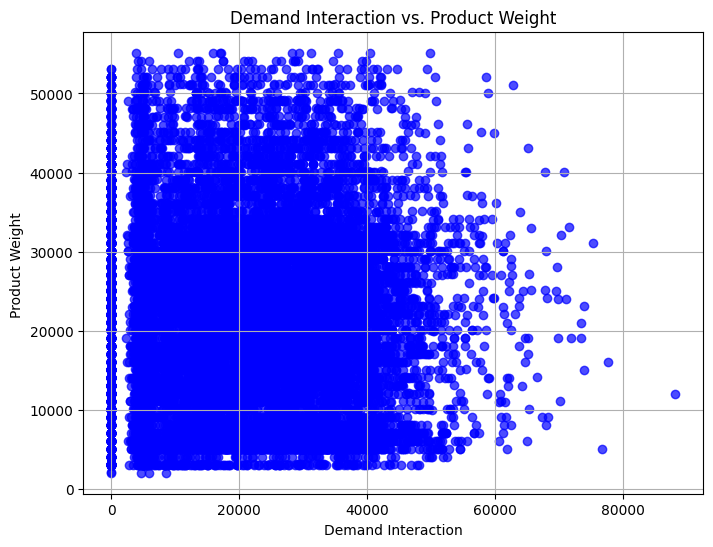

In [45]:
#Demand Interaction vs. Product Weight
plt.figure(figsize=(8, 6))
plt.scatter(data_train['demand_interaction'], data_train['product_wg_ton'], c='b', alpha=0.7)
plt.title('Demand Interaction vs. Product Weight')
plt.xlabel('Demand Interaction')
plt.ylabel('Product Weight ')
plt.grid(True)
plt.show()

The scatter plot shows that heavier products tend to have more demand interaction, but there are other factors that influence demand interaction as well, such as price, brand, and quality.

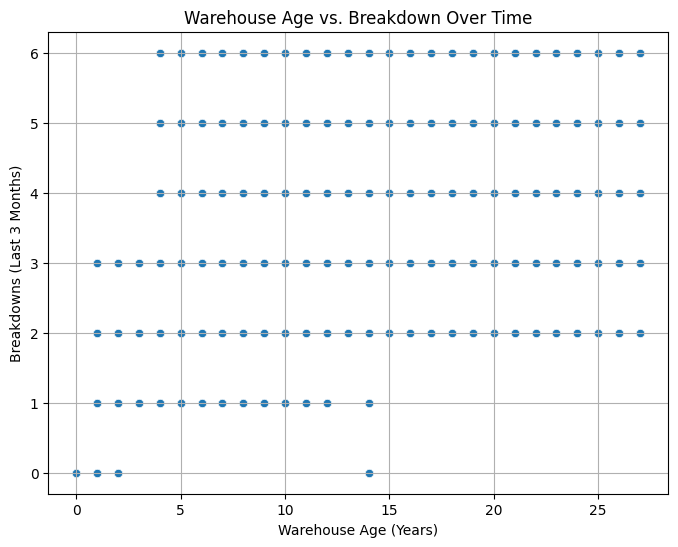

In [46]:
#Scatter plot showing breakdown of warehouse with respect tho their age
plt.figure(figsize=(8, 6))
sns.scatterplot(x=data_train['warehouse_age'], y=data_train['wh_breakdown_l3m'])
plt.title('Warehouse Age vs. Breakdown Over Time')
plt.xlabel('Warehouse Age (Years)')
plt.ylabel('Breakdowns (Last 3 Months)')
plt.grid(True)
plt.show()

Warehouses tend to break down more often as they age. Warehouse managers should be more proactive in maintaining their warehouses and have a plan in place to deal with breakdowns when they happen.

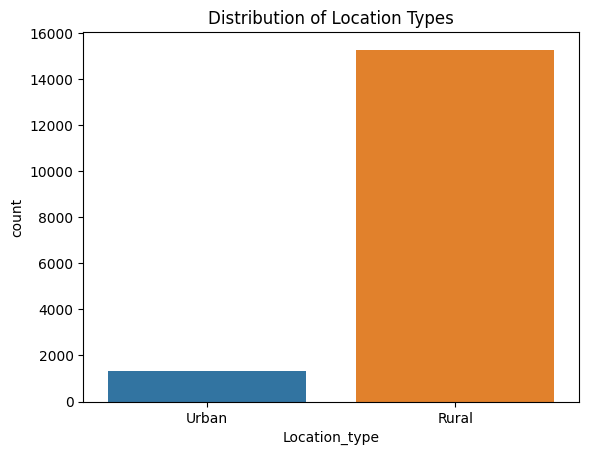

In [47]:
# Bar chart representing distribution of location types
sns.countplot(x='Location_type', data=data_train)
plt.title('Distribution of Location Types')
plt.show()

Most of the warehouse is located in Rural areas.

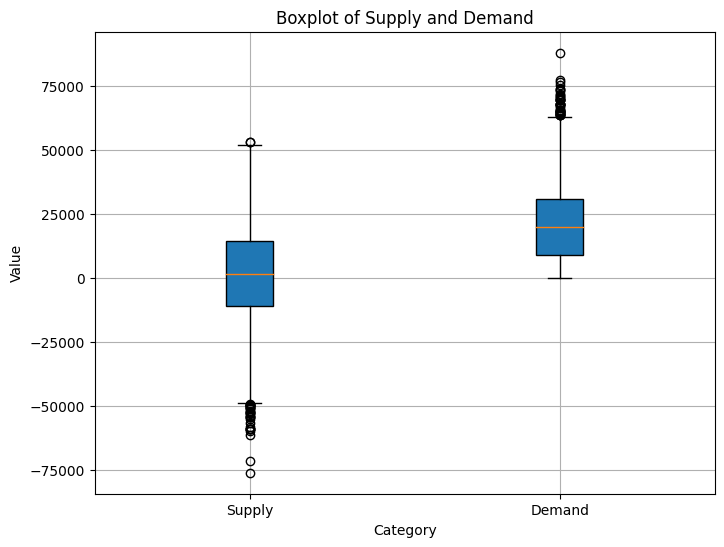

In [48]:
# Create a boxplot for supply and demand
fig, ax = plt.subplots(figsize=(8, 6))
bp = ax.boxplot([data_train["supply"], data_train["demand"]], patch_artist=True, labels=["Supply", "Demand"])

plt.title('Boxplot of Supply and Demand')
plt.xlabel('Category')
plt.ylabel('Value')
plt.grid(True)
plt.show()

The box plot shows that the demand for the product is greater than the supply. This means that the product is overdemanded.

Demand is greater than supply. Product is overdemanded.

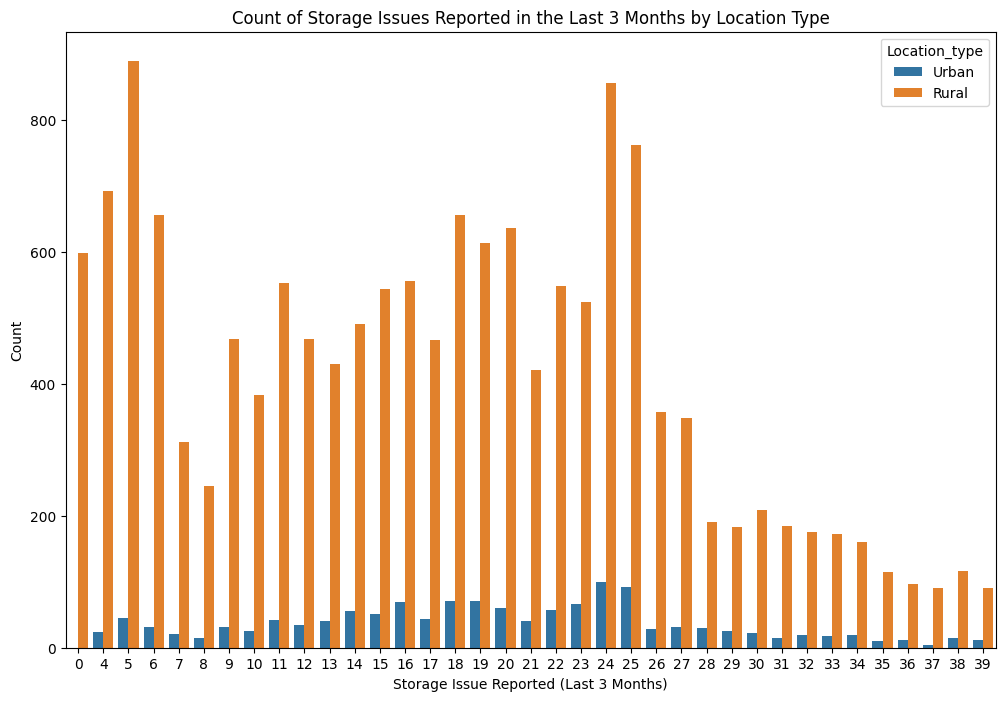

In [49]:
plt.figure(figsize=(12,8))
sns.countplot(x=data_train['storage_issue_reported_l3m'],hue=data_train['Location_type'])
plt.title('Count of Storage Issues Reported in the Last 3 Months by Location Type')
plt.xlabel('Storage Issue Reported (Last 3 Months)')
plt.ylabel('Count')
plt.show()

The graph shows that compared to urban area rural area have more storage issues reported.

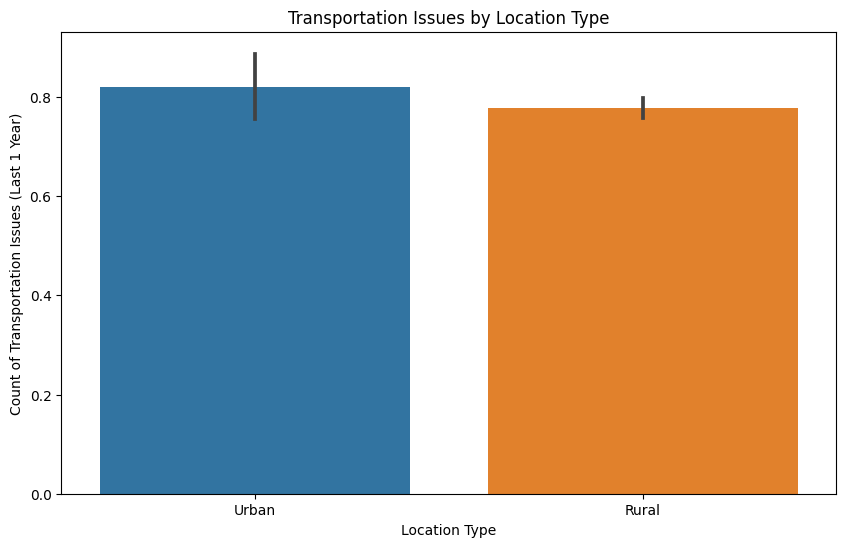

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data_train, x='Location_type', y='transport_issue_l1y')

plt.title('Transportation Issues by Location Type')
plt.xlabel('Location Type')
plt.ylabel('Count of Transportation Issues (Last 1 Year)')
plt.show()

In [51]:
catgory = []
numerical = []
for i in data_train.columns:
    if data_train[i].dtype == 'object':
        catgory.append(i)
    else:
        numerical.append(i)
print(catgory)
print(numerical)
x_num=data_train[numerical]
y_cat=data_train[catgory]

['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size', 'zone', 'wh_owner_type', 'approved_wh_govt_certificate']
['WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num', 'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach', 'wh_breakdown_l3m', 'govt_check_l3m', 'product_wg_ton', 'warehouse_age', 'demand', 'supply', 'demand_interaction']


In [52]:
def univariateAnalysis_category(cat_column):
    print("Details of " + cat_column)
    print("----------------------------------------------------------------")
    print(y_cat[cat_column].value_counts())
    plt.figure()
    y_cat[cat_column].value_counts().plot.bar(title="Frequency Distribution of " + cat_column)
    plt.show()
    print("       ")

In [53]:
data_train.drop(['WH_Manager_ID'], axis='columns', inplace=True)


In [54]:
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   Location_type                 16620 non-null  object 
 2   WH_capacity_size              16620 non-null  object 
 3   zone                          16620 non-null  object 
 4   WH_regional_zone              16620 non-null  int64  
 5   num_refill_req_l3m            16620 non-null  int64  
 6   transport_issue_l1y           16620 non-null  int64  
 7   Competitor_in_mkt             16620 non-null  int64  
 8   retail_shop_num               16620 non-null  int64  
 9   wh_owner_type                 16620 non-null  object 
 10  distributor_num               16620 non-null  int64  
 11  flood_impacted                16620 non-null  int64  
 12  flood_proof                   16620 non-null  int64  
 13  e

In [55]:

df_cat = data_train.select_dtypes(include = ['object'])
lstcatcolumns = list(df_cat.columns.values)
lstcatcolumns

['Ware_house_ID',
 'Location_type',
 'WH_capacity_size',
 'zone',
 'wh_owner_type',
 'approved_wh_govt_certificate']

In [56]:
#removing columns which are created for EDA
data_train=data_train.drop(['demand','warehouse_age','supply','demand_interaction'],axis=1)
data_train.columns

Index(['Ware_house_ID', 'Location_type', 'WH_capacity_size', 'zone',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [57]:
#Outlier Treatment
df_numerical = data_train.select_dtypes(include = ['float64', 'int64'])
lstnumericcolumns = list(df_numerical.columns.values)
len(lstnumericcolumns)

17

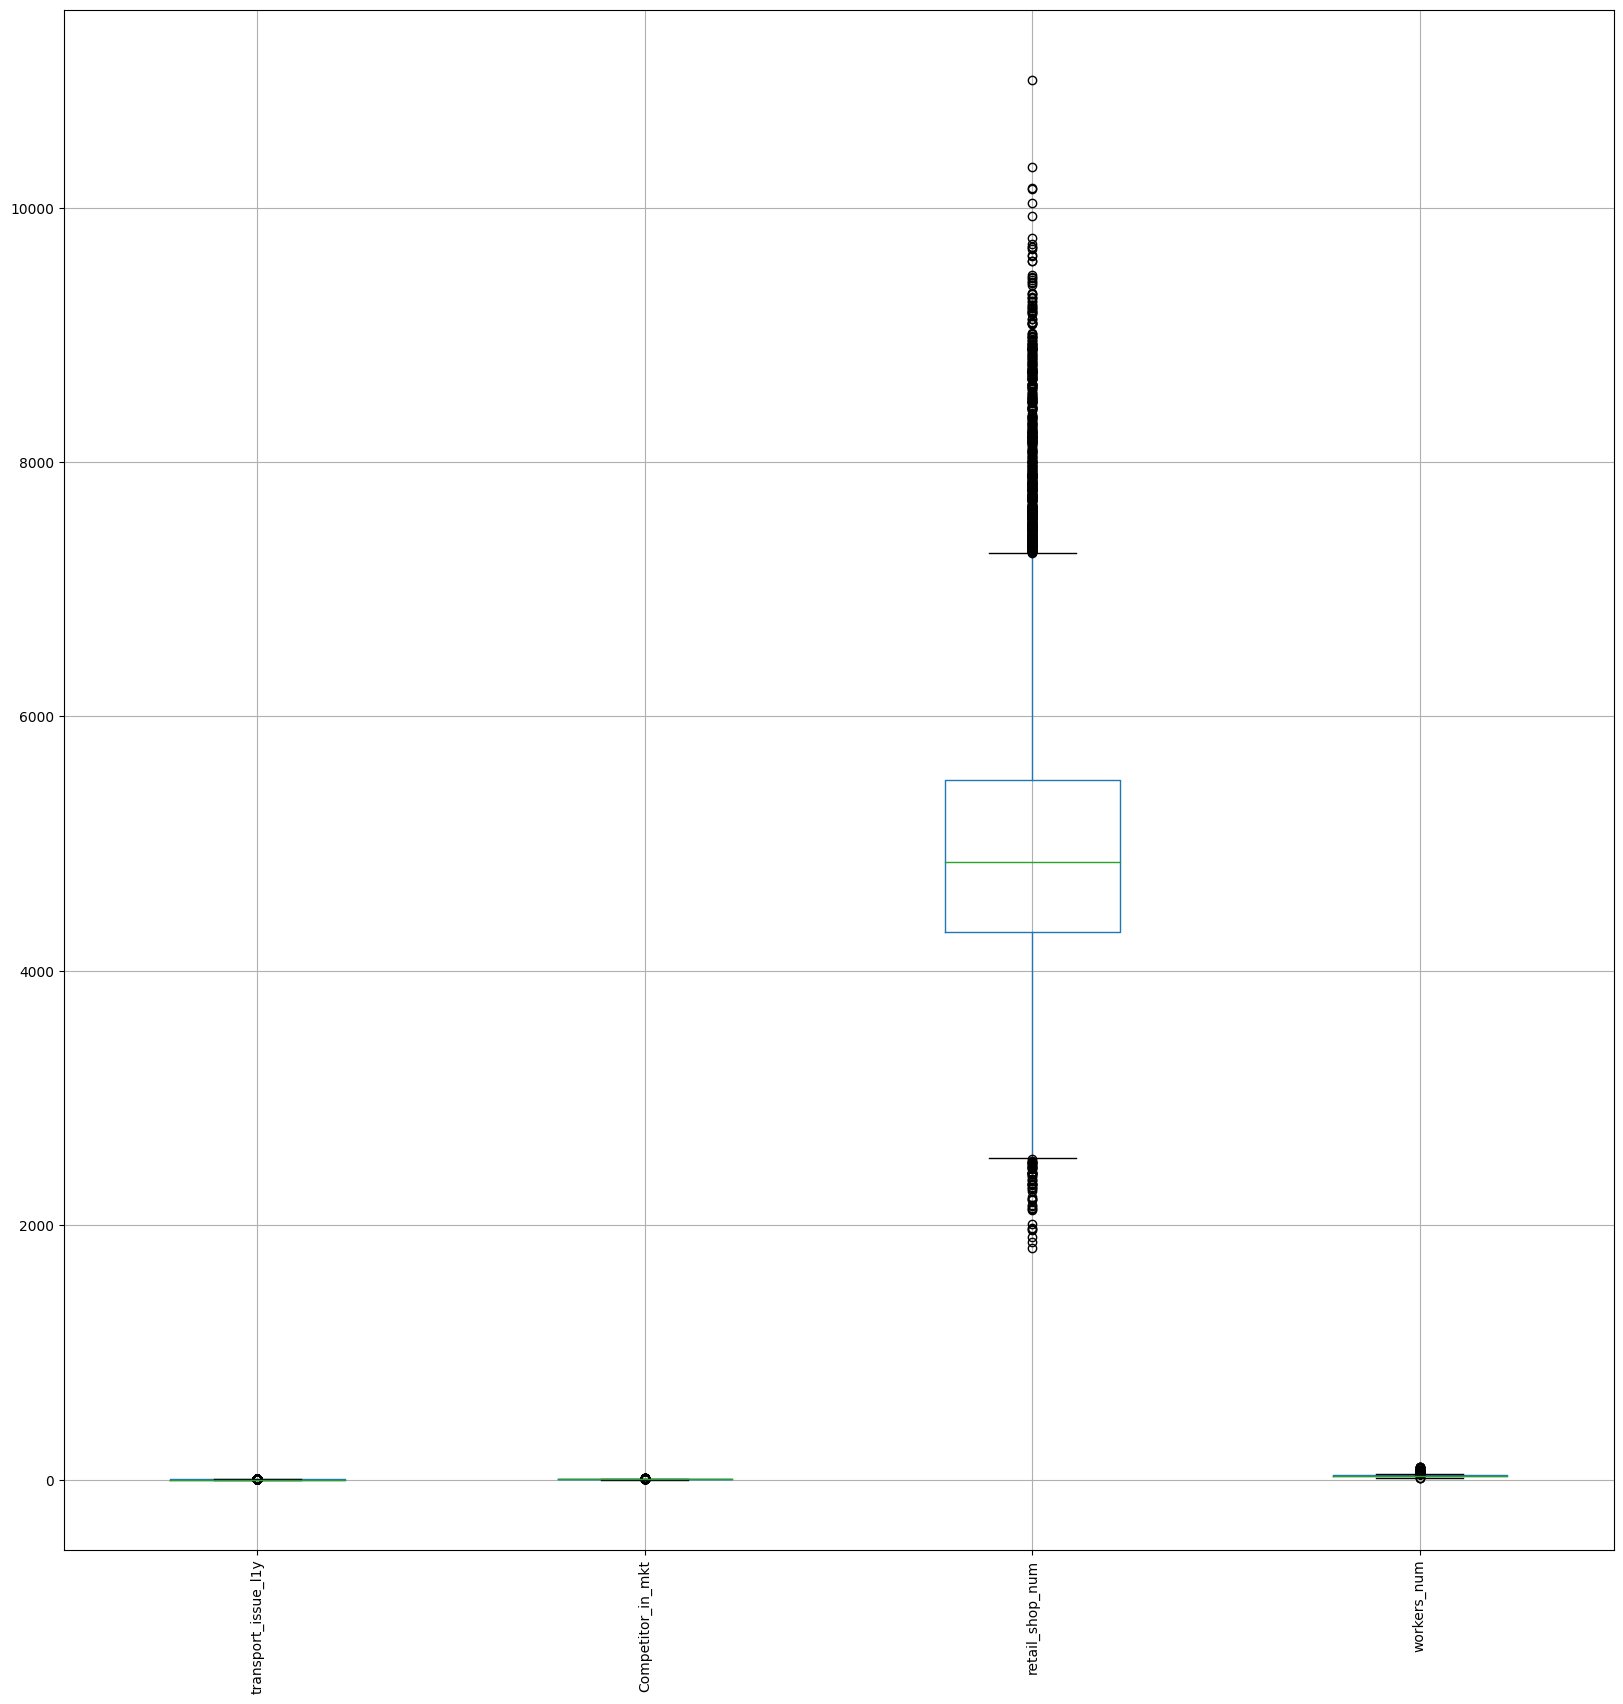

In [58]:
outlier = ['transport_issue_l1y','Competitor_in_mkt','retail_shop_num','workers_num',]
df_numerical[outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()


In [59]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [60]:
lr,ur=remove_outlier(df_numerical['transport_issue_l1y'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_numerical['transport_issue_l1y']=np.where(df_numerical['transport_issue_l1y']>ur,ur,df_numerical['transport_issue_l1y'])
df_numerical['transport_issue_l1y']=np.where(df_numerical['transport_issue_l1y']<lr,lr,df_numerical['transport_issue_l1y'])
print('')

Lower Range : -1.5 
Upper Range : 2.5



In [61]:
lr,ur=remove_outlier(df_numerical['Competitor_in_mkt'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_numerical['Competitor_in_mkt']=np.where(df_numerical['Competitor_in_mkt']>ur,ur,df_numerical['Competitor_in_mkt'])
df_numerical['Competitor_in_mkt']=np.where(df_numerical['Competitor_in_mkt']<lr,lr,df_numerical['Competitor_in_mkt'])
print('')

Lower Range : -1.0 
Upper Range : 7.0



In [62]:
lr,ur=remove_outlier(df_numerical['retail_shop_num'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_numerical['retail_shop_num']=np.where(df_numerical['retail_shop_num']>ur,ur,df_numerical['retail_shop_num'])
df_numerical['retail_shop_num']=np.where(df_numerical['retail_shop_num']<lr,lr,df_numerical['retail_shop_num'])
print('')

Lower Range : 2522.5 
Upper Range : 7286.5



In [63]:
lr,ur=remove_outlier(df_numerical['workers_num'])
print('Lower Range :',lr,'\nUpper Range :',ur)
df_numerical['workers_num']=np.where(df_numerical['workers_num']>ur,ur,df_numerical['workers_num'])
df_numerical['workers_num']=np.where(df_numerical['workers_num']<lr,lr,df_numerical['workers_num'])
print('')

Lower Range : 10.5 
Upper Range : 46.5



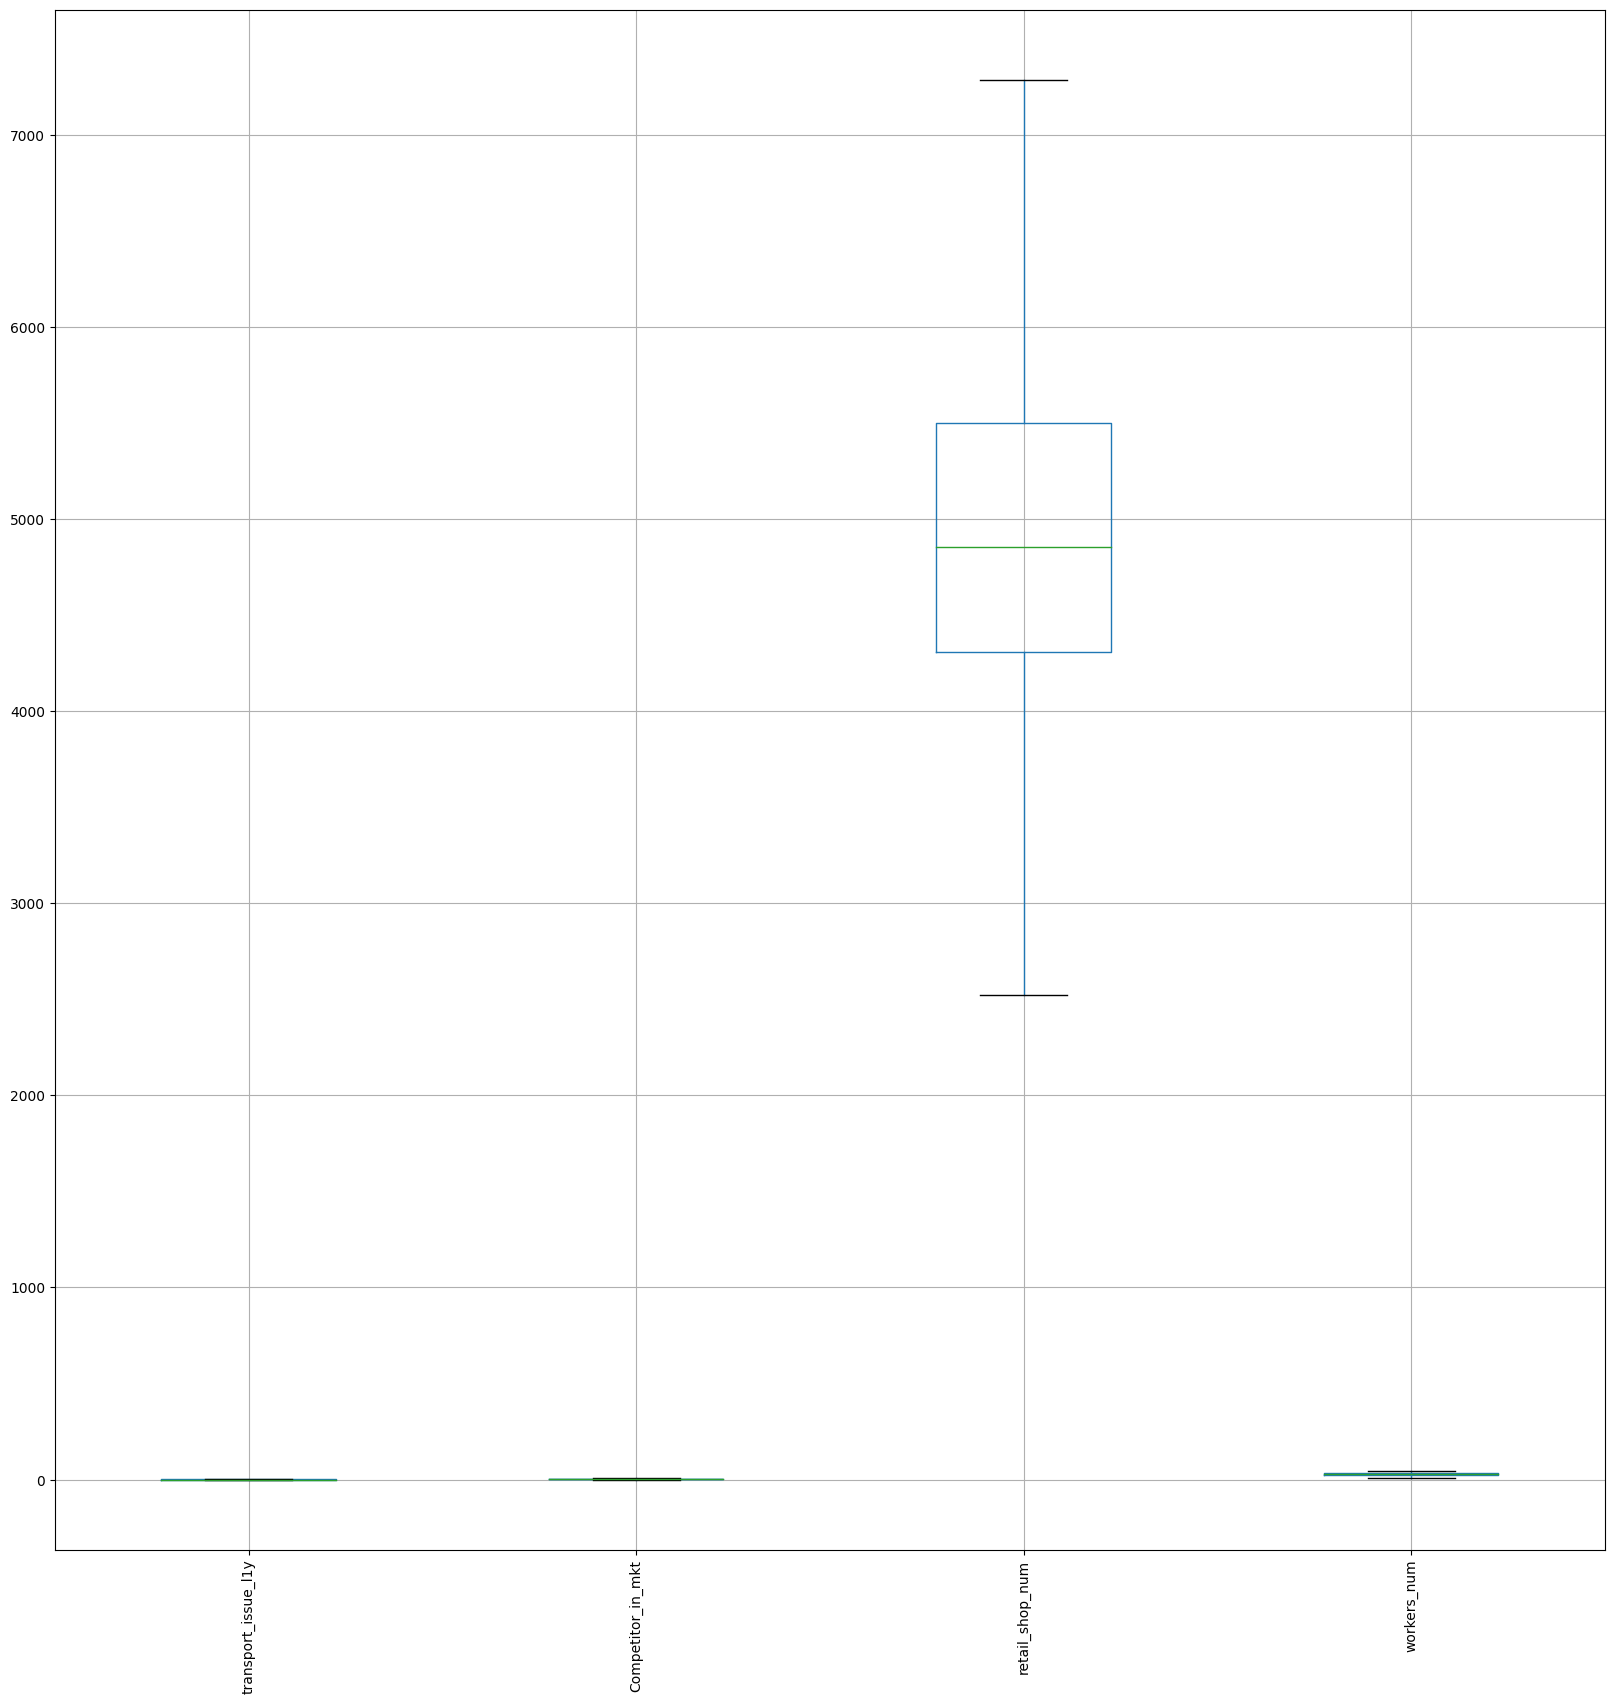

In [64]:
df_numerical[outlier].boxplot(figsize=(20,20))
plt.xticks(rotation=90)
plt.show()

In [65]:
df = pd.concat([df_cat, df_numerical], axis=1)
cat1=['Location_type','zone', 'WH_regional_zone',
       'wh_owner_type']
df_new =pd.get_dummies(df, columns=cat1,drop_first=True)
df_new

,Ware_house_ID,WH_capacity_size,approved_wh_govt_certificate,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,...,Location_type_Urban,zone_North,zone_South,zone_West,WH_regional_zone_2,WH_regional_zone_3,WH_regional_zone_4,WH_regional_zone_5,WH_regional_zone_6,wh_owner_type_Rented
0,WH_100000,Small,A,3,1.0,2.0,4651.0,24,0,1,...,True,False,False,True,False,False,False,False,True,True
1,WH_100001,Large,A,0,0.0,4.0,6217.0,47,0,0,...,False,True,False,False,False,False,False,True,False,False
2,WH_100002,Mid,A,1,0.0,4.0,4306.0,64,0,0,...,False,False,True,False,True,False,False,False,False,False
3,WH_100003,Mid,A+,7,2.5,2.0,6000.0,50,0,0,...,False,True,False,False,False,True,False,False,False,True
4,WH_100004,Large,C,3,1.0,2.0,4740.0,42,1,0,...,False,True,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,Large,B+,3,1.0,6.0,4779.0,70,0,0,...,True,False,False,True,False,False,False,False,True,True
16616,WH_116616,Large,B+,2,0.0,2.0,5718.0,26,0,0,...,True,True,False,False,False,False,False,True,False,False
16617,WH_116617,Large,B,5,0.0,4.0,4514.0,50,1,0,...,False,True,False,False,False,False,False,False,True,False
16618,WH_116618,Small,A,3,2.0,3.0,5829.0,59,1,0,...,False,False,False,True,False,False,False,False,True,True


In [66]:
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Small',0)
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Mid',1)
df_new['WH_capacity_size']=df_new['WH_capacity_size'].replace('Large',2)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('A+',5)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('A',4)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('B+',3)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('B',2)
df_new['approved_wh_govt_certificate']=df_new['approved_wh_govt_certificate'].replace('C',1)
df_new.head()

,Ware_house_ID,WH_capacity_size,approved_wh_govt_certificate,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,...,Location_type_Urban,zone_North,zone_South,zone_West,WH_regional_zone_2,WH_regional_zone_3,WH_regional_zone_4,WH_regional_zone_5,WH_regional_zone_6,wh_owner_type_Rented
0,WH_100000,0,4,3,1.0,2.0,4651.0,24,0,1,...,True,False,False,True,False,False,False,False,True,True
1,WH_100001,2,4,0,0.0,4.0,6217.0,47,0,0,...,False,True,False,False,False,False,False,True,False,False
2,WH_100002,1,4,1,0.0,4.0,4306.0,64,0,0,...,False,False,True,False,True,False,False,False,False,False
3,WH_100003,1,5,7,2.5,2.0,6000.0,50,0,0,...,False,True,False,False,False,True,False,False,False,True
4,WH_100004,2,1,3,1.0,2.0,4740.0,42,1,0,...,False,True,False,False,False,False,False,True,False,False


In [67]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df_num_scaled=ss.fit_transform(df_numerical)
k_means = KMeans(n_clusters = 2)
# Data must be given scaled
k_means.fit(df_num_scaled)

C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2)

In [68]:
k_means.labels_

array([0, 0, 1, ..., 1, 1, 1])

In [69]:
k_means.inertia_


252122.62555614262

In [70]:
k_means = KMeans(n_clusters = 3)
k_means.fit(df_num_scaled)
k_means.inertia_

C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


236649.3564846929

In [71]:
wss =[] 
# data must be scaled
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(df_num_scaled)
    wss.append(KM.inertia_)
wss

C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\

[282540.0,
 252122.957585672,
 237211.01555493384,
 224889.8823073319,
 214154.34253132585,
 209723.2775869111,
 199809.976472584,
 194485.0419169847,
 190549.82489244654,
 187445.53876821653]

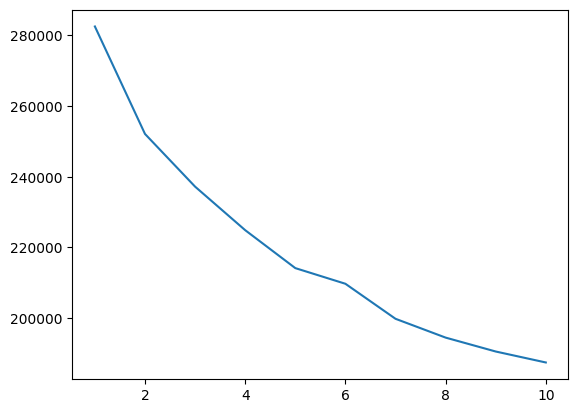

In [72]:
plt.plot(range(1,11), wss)

In [73]:
k_means = KMeans(n_clusters = 2)
k_means.fit(df_num_scaled)
labels = k_means.labels_
data_train["Clus_kmeans"] = labels
data_train.head(5)

C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,Ware_house_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Clus_kmeans
0,WH_100000,Urban,Small,West,6,3,1,2,4651,Rented,...,91,29.0,2009.0,13,0,A,5,15,17115,1
1,WH_100001,Rural,Large,North,5,0,0,4,6217,Company Owned,...,210,31.0,2009.0,4,0,A,3,17,5074,1
2,WH_100002,Rural,Mid,South,2,1,0,4,4306,Company Owned,...,161,37.0,2009.0,17,0,A,6,22,23137,0
3,WH_100003,Rural,Mid,North,3,7,4,2,6000,Rented,...,103,21.0,2009.0,17,1,A+,3,27,22115,1
4,WH_100004,Rural,Large,North,5,3,1,2,4740,Company Owned,...,112,25.0,2009.0,18,0,C,6,24,24071,0


In [74]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(df_num_scaled,labels)


0.10158750599690104

In [75]:
sil_width = silhouette_samples(df_num_scaled,labels)
data_train["sil_width"] = sil_width
data_train.head(5)

,Ware_house_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,wh_owner_type,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,Clus_kmeans,sil_width
0,WH_100000,Urban,Small,West,6,3,1,2,4651,Rented,...,29.0,2009.0,13,0,A,5,15,17115,1,0.012093
1,WH_100001,Rural,Large,North,5,0,0,4,6217,Company Owned,...,31.0,2009.0,4,0,A,3,17,5074,1,0.137026
2,WH_100002,Rural,Mid,South,2,1,0,4,4306,Company Owned,...,37.0,2009.0,17,0,A,6,22,23137,0,0.071919
3,WH_100003,Rural,Mid,North,3,7,4,2,6000,Rented,...,21.0,2009.0,17,1,A+,3,27,22115,1,0.016804
4,WH_100004,Rural,Large,North,5,3,1,2,4740,Company Owned,...,25.0,2009.0,18,0,C,6,24,24071,0,0.057659


In [76]:
#checking relevance of categorical values 
from scipy import stats

categorical_df=data_train.select_dtypes(include='object')
for column in categorical_df:
    groups = data_train[column].unique()
    anova_results = stats.f_oneway(*[data_train['product_wg_ton'][data_train[column] == group] for group in groups])
    
    print(f"ANOVA for {column}:")
    print("F-statistic:", anova_results.statistic)
    print("P-value:", anova_results.pvalue)
    print("\n")

ANOVA for Ware_house_ID:
F-statistic: nan
P-value: nan


ANOVA for Location_type:
F-statistic: 89.5947065102753
P-value: 3.3056447660070946e-21


ANOVA for WH_capacity_size:
F-statistic: 3.202162815374589
P-value: 0.040699238197372825


ANOVA for zone:
F-statistic: 0.6236463026603639
P-value: 0.5996313085395856


ANOVA for wh_owner_type:
F-statistic: 0.08095580785571937
P-value: 0.7760098295560516


ANOVA for approved_wh_govt_certificate:
F-statistic: 409.6024177004083
P-value: 0.0




C:\Users\Preethi\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  warnings.warn(stats.DegenerateDataWarning(msg))


#### Highly Relevant Features:

Location_type: This feature exhibits significant differences in the means of the numerical variable across different location types. It is highly relevant to the analysis. Approved_wh_govt_certificate: This feature also demonstrates significant differences across different certificate approval types, making it highly relevant.

#### Potentially Relevant Feature:

WH_capacity_size: The ANOVA test yields a borderline result with a p-value of 0.0628, indicating potential but not significant differences across capacity sizes. Further investigation may be warranted.

#### Less Relevant Features:

Zone, wh_owner_type: These features do not show significant differences in the means of the numerical variable across their categories, rendering them less relevant for the current analysis.

In [77]:
#Removing less relevant features
data_train=data_train.drop(['zone','wh_owner_type','Clus_kmeans','sil_width'],axis=1)
data_train.columns

Index(['Ware_house_ID', 'Location_type', 'WH_capacity_size',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'wh_est_year', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

### Data Preprocessing on Testing data

In [78]:
test_df=pd.read_csv('supply_test.csv')
test_df.head()

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,16621,WH_116621,EID_66621,Rural,Large,North,Zone 5,5,0,3,...,0,156,30.0,2006.0,24,0,A,2,5,30132
1,16622,WH_116622,EID_66622,Rural,Large,North,Zone 5,5,0,2,...,1,79,31.0,2019.0,5,1,C,2,24,6075
2,16623,WH_116623,EID_66623,Rural,Small,North,Zone 6,3,0,3,...,1,70,41.0,2008.0,19,1,A+,5,9,24076
3,16624,WH_116624,EID_66624,Rural,Mid,West,Zone 4,5,2,2,...,1,255,33.0,2017.0,9,1,A+,3,11,13092
4,16625,WH_116625,EID_66625,Urban,Mid,North,Zone 4,6,0,4,...,0,205,20.0,1999.0,25,0,B,4,26,29071


In [79]:
test_df['workers_num'].fillna(test_df['workers_num'].median(),inplace=True)
test_df['wh_est_year'].fillna(test_df['wh_est_year'].median(), inplace=True)
test_df.isnull().sum()

Unnamed: 0                        0
Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                       0
wh_est_year                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate    206
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [80]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


In [81]:
def num(d):
    num = ''.join(filter(str.isdigit, d))
    return int(num)
data_train['Ware_house_ID']=data_train['Ware_house_ID'].apply(num)

In [82]:
data_train['Ware_house_ID'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 16620 entries, 0 to 16619
Series name: Ware_house_ID
Non-Null Count  Dtype
--------------  -----
16620 non-null  int64
dtypes: int64(1)
memory usage: 130.0 KB


In [83]:
cat=data_train.select_dtypes(include='object')
d=cat.columns
d

Index(['Location_type', 'WH_capacity_size', 'approved_wh_govt_certificate'], dtype='object')

In [84]:
#Label Encoding Categorical variable
le=LabelEncoder()
data_train['location encoded']=le.fit_transform(data_train['Location_type'])
data_train['WH_capacity_size encoded']=le.fit_transform(data_train['WH_capacity_size'])
data_train['encoded_wh_govt_certificate']=le.fit_transform(data_train['approved_wh_govt_certificate'])
df_1=data_train.drop(['Location_type','WH_capacity_size','approved_wh_govt_certificate'],axis=1)
df_1.head()

,Ware_house_ID,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,...,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton,location encoded,WH_capacity_size encoded,encoded_wh_govt_certificate
0,100000,6,3,1,2,4651,24,0,1,1,...,29.0,2009.0,13,0,5,15,17115,1,2,0
1,100001,5,0,0,4,6217,47,0,0,1,...,31.0,2009.0,4,0,3,17,5074,0,0,0
2,100002,2,1,0,4,4306,64,0,0,0,...,37.0,2009.0,17,0,6,22,23137,0,1,0
3,100003,3,7,4,2,6000,50,0,0,0,...,21.0,2009.0,17,1,3,27,22115,0,1,1
4,100004,5,3,1,2,4740,42,1,0,1,...,25.0,2009.0,18,0,6,24,24071,0,0,4


In [85]:
test_df['WH_regional_zone']=test_df['WH_regional_zone'].apply(extract_num)
test_df['Ware_house_ID']=test_df['Ware_house_ID'].apply(num)


In [86]:
#Removing less relevant features
test_df=test_df.drop(['Unnamed: 0','WH_Manager_ID','zone','wh_owner_type',],axis=1)
test_df.columns

Index(['Ware_house_ID', 'Location_type', 'WH_capacity_size',
       'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'distributor_num',
       'flood_impacted', 'flood_proof', 'electric_supply', 'dist_from_hub',
       'workers_num', 'wh_est_year', 'storage_issue_reported_l3m',
       'temp_reg_mach', 'approved_wh_govt_certificate', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton'],
      dtype='object')

In [87]:
#Label Encoding Categorical variable
le=LabelEncoder()
test_df['location encoded']=le.fit_transform(test_df['Location_type'])
test_df['WH_capacity_size encoded']=le.fit_transform(test_df['WH_capacity_size'])
test_df['encoded_wh_govt_certificate']=le.fit_transform(test_df['approved_wh_govt_certificate'])
df_2=test_df.drop(['Location_type','WH_capacity_size','approved_wh_govt_certificate'],axis=1)

In [88]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5529 entries, 0 to 5528
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Ware_house_ID                5529 non-null   int64  
 1   WH_regional_zone             5529 non-null   int64  
 2   num_refill_req_l3m           5529 non-null   int64  
 3   transport_issue_l1y          5529 non-null   int64  
 4   Competitor_in_mkt            5529 non-null   int64  
 5   retail_shop_num              5529 non-null   int64  
 6   distributor_num              5529 non-null   int64  
 7   flood_impacted               5529 non-null   int64  
 8   flood_proof                  5529 non-null   int64  
 9   electric_supply              5529 non-null   int64  
 10  dist_from_hub                5529 non-null   int64  
 11  workers_num                  5529 non-null   float64
 12  wh_est_year                  5529 non-null   float64
 13  storage_issue_repo

### Splitting Training and Testing Data



In [89]:
X_train=df_1.drop('product_wg_ton',axis=1)
y_train=df_1['product_wg_ton']
X_test=df_2.drop('product_wg_ton',axis=1)
y_test=df_2['product_wg_ton']
X_train.head(2)

,Ware_house_ID,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,location encoded,WH_capacity_size encoded,encoded_wh_govt_certificate
0,100000,6,3,1,2,4651,24,0,1,1,91,29.0,2009.0,13,0,5,15,1,2,0
1,100001,5,0,0,4,6217,47,0,0,1,210,31.0,2009.0,4,0,3,17,0,0,0


In [90]:
y_train.head(2)

0    17115
1     5074
Name: product_wg_ton, dtype: int64

In [91]:
X_test.head(2)

,Ware_house_ID,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,location encoded,WH_capacity_size encoded,encoded_wh_govt_certificate
0,116621,5,5,0,3,5590,15,0,0,0,156,30.0,2006.0,24,0,2,5,0,0,0
1,116622,5,5,0,2,5856,40,0,0,1,79,31.0,2019.0,5,1,2,24,0,0,4


In [92]:
y_test.head(2)

0    30132
1     6075
Name: product_wg_ton, dtype: int64

### Machine Learning Model Development and Performance Evaluation

In [93]:
lr=LinearRegression()
dt=DecisionTreeRegressor()
rf=RandomForestRegressor()
ada=AdaBoostRegressor()
gb=GradientBoostingRegressor()


grid_cv={'LinearRegression':lr,'DecisionTreeRegressor':dt,'RandomForestRegressor':rf,'AdaBoostRegressor':ada,
         'GradientBoostingRegressor':gb}
print("\033[1m\033[3mEvaluation Result \n")
for regressor_name,regressor in grid_cv.items():
    regressor.fit(X_train,y_train)
    y_pred=regressor.predict(X_test)
    score=r2_score(y_pred,y_test)
    mse=mean_squared_error(y_pred,y_test)
    msa=mean_absolute_error(y_pred,y_test)
    print('\033[1m\033[3m',regressor_name,'\n')
    print("mean square error = ",mse)
    print("mean absolute error = ",msa)
    print("r2 score = ",score*100,'\n')

Evaluation Result 

 LinearRegression 

mean square error =  3092565.4313959563
mean absolute error =  1301.8291725261297
r2 score =  97.67389231239801 

 DecisionTreeRegressor 

mean square error =  1671498.4579489962
mean absolute error =  894.213420148309
r2 score =  98.77524755823771 

 RandomForestRegressor 

mean square error =  884106.846289745
mean absolute error =  710.5208898534997
r2 score =  99.34952798571695 

 AdaBoostRegressor 

mean square error =  2943763.8614872396
mean absolute error =  1383.3370288605267
r2 score =  97.75235415622558 

 GradientBoostingRegressor 

mean square error =  836023.935039012
mean absolute error =  703.1388595142848
r2 score =  99.38653609728333 



In [96]:
import xgboost as xgb
xg=xgb.XGBRegressor()
xg.fit(X_train,y_train)
y_pred=xg.predict(X_test)

In [97]:
score=r2_score(y_pred,y_test)
mse=mean_squared_error(y_pred,y_test)
msa=mean_absolute_error(y_pred,y_test)
print("\033[1m\033[3mEvaluation Result \n")
print("mean square error = ",mse)
print("mean absolute error = ",msa)
print("r2 score = ",score*100)
    

Evaluation Result 

mean square error =  1039317.447768726
mean absolute error =  767.782921451452
r2 score =  99.22158968101101


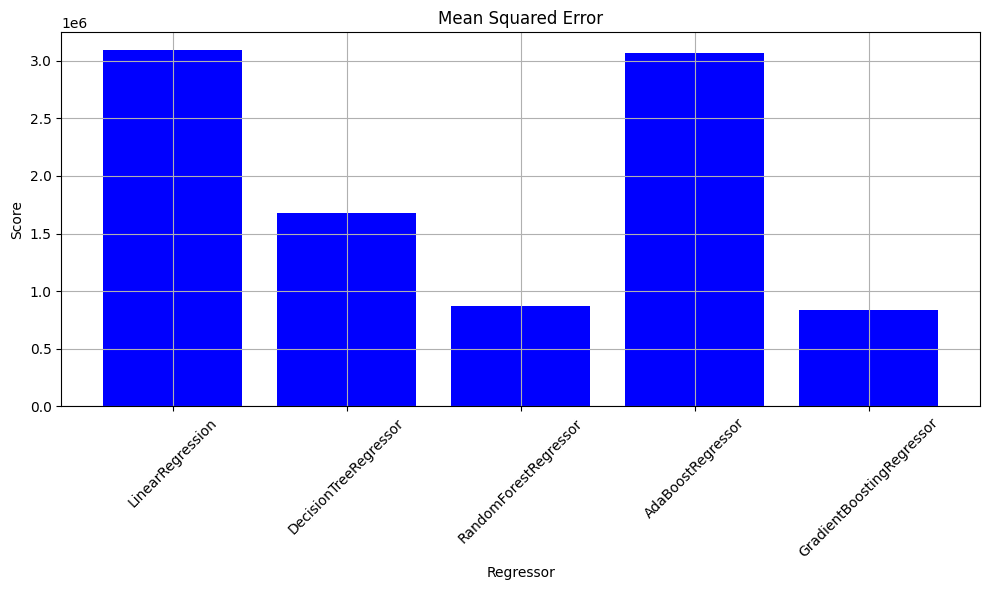

In [102]:
# Define regressors and their names
grid_cv = {
    'LinearRegression': lr,
    'DecisionTreeRegressor': dt,
    'RandomForestRegressor': rf,
    'AdaBoostRegressor': ada,
    'GradientBoostingRegressor': gb
}

# Initialize lists to store evaluation metrics
mse_scores = []
msa_scores = []
r2_scores = []
regressor_names = []

# Evaluate each regressor
for regressor_name, regressor in grid_cv.items():
    regressor_names.append(regressor_name)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    mse = mean_squared_error(y_pred, y_test)
    msa = mean_absolute_error(y_pred, y_test)
    r2 = r2_score(y_pred, y_test)
    mse_scores.append(mse)
    msa_scores.append(msa)
    r2_scores.append(r2 * 100)

# Plotting Mean Squared Error
plt.figure(figsize=(10, 6))
plt.bar(regressor_names, mse_scores, color='blue')
plt.title('Mean Squared Error')
plt.xlabel('Regressor')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



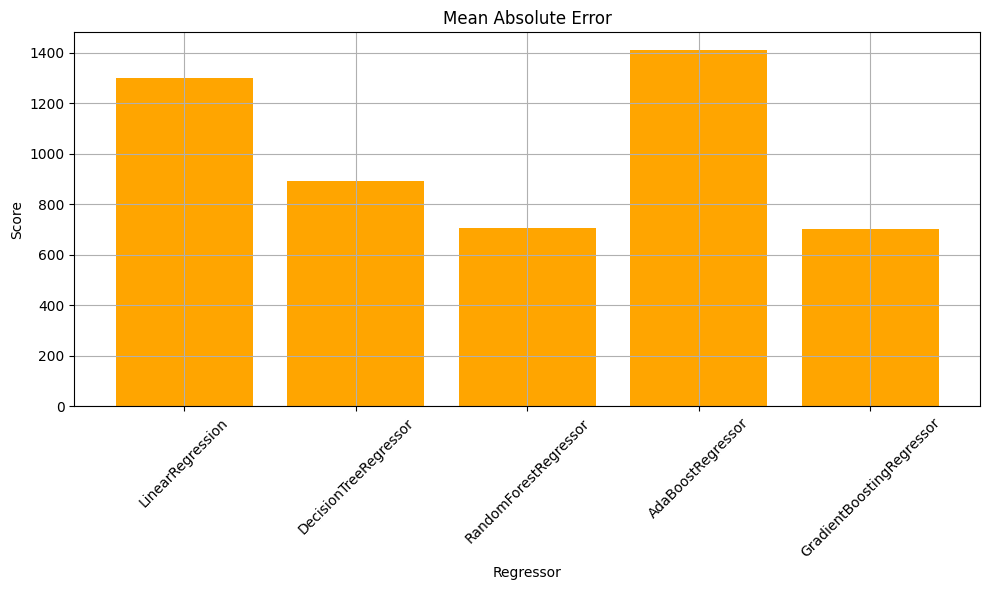

In [104]:
# Plotting Mean Absolute Error
plt.figure(figsize=(10, 6))
plt.bar(regressor_names, msa_scores, color='orange')
plt.title('Mean Absolute Error')
plt.xlabel('Regressor')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



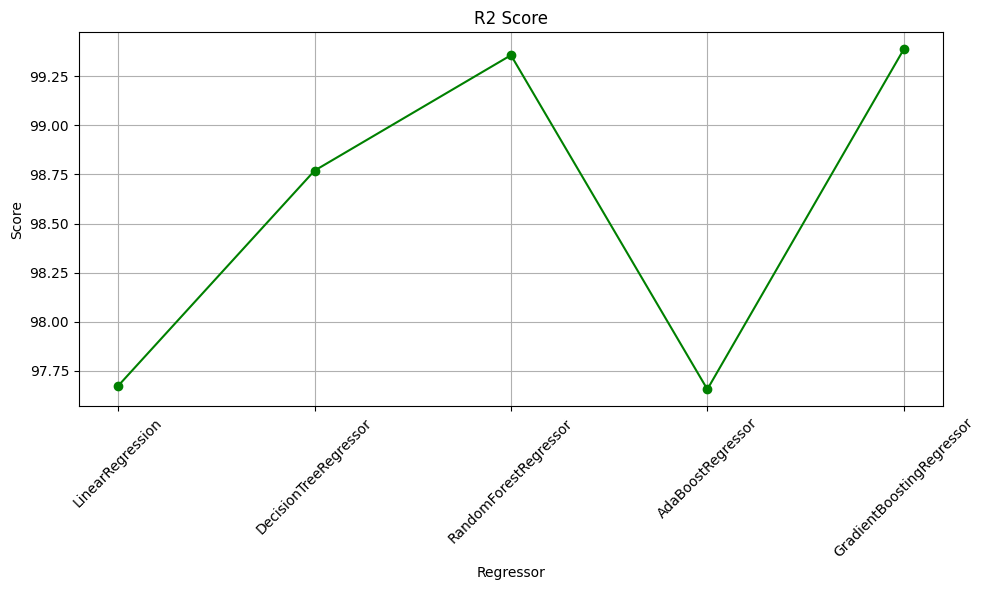

In [103]:
# Plotting R2 Score
plt.figure(figsize=(10, 6))
plt.plot(regressor_names, r2_scores, marker='o', color='green')
plt.title('R2 Score')
plt.xlabel('Regressor')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Random Forest and Gradient Boosting Regressors were the best performing models among those evaluated. They had lower mean squared error and mean absolute error, which means they were better at predicting the target variable. The R² scores for both models were close to 99%, which means they fit the data well. Therefore, for this particular dataset, the Gradient Boosting Regressor is the best choice because it gives the most accurate and precise predictions of the target variable.

### CONCLUSION

A Random Forest Regressor model was developed to predict the optimum product weight for shipments. The project provided valuable insights into supply chain dynamics and identified areas for improvement. Implementing the recommended next steps can lead to further enhancements and cost savings for the company.
1. 91.25 % warehouses are in rural areas in comparison of rural area has 8.17%.
2. 82 % warehouses are of large & mid type.
3. Nor th zone & Zone 6 has majority of warehouses.
4. Avg Product wt tone is supplied more to urban area in comparison of rural area

#### Recommendation

1. Product wt tone should be supplied to be increased for rural area. Those warehouses are in urban areas should managed properly to cater more customer demand.
2. Renovation of roofs, pallets and others broken racks etc should be done to avoid unnecessary loss of product.